# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Gapminder datasets are being used to investigate the relationship between GDP/GNI per capita, standard of living, carbon footprint, healthcare and the importance of export in each country's economy.

> Few questions which are of interest:

>> 1) What is the income per capita distribution by country?

>> 2) Does lower level of corruption lead to higher income (GNI/capita)?

>> 3) Does higher income (GNI/capita) lead to higher standard of living (HDI)?

>> 4) What are the characteristics of export-dependent nations? 

>> 5) Will higher level of expenditure in healthcare, especially if led by government, contribute to higher life expectancy?

>> 6) Do higher economic output (GDP/capita) and production of oil lead to higher carbon footpirnt (CO2 emission/capita)?

In [1]:
'''Importing all required libraries'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Datasets are loaded, cleaned and merged in order to enable the studying of relationship between variables.

### General Properties
Few datasets are printed out to evaluate the quality and completion of the data.

In [2]:
#Loading and reading all the required datasets in excel to answer questions above

gdp_pc = pd.read_excel('indicator gapminder gdp_per_capita_ppp.xlsx', sheet_name='Data')
gni_pc = pd.read_excel('indicatorGNIpercapitaATLAS.xlsx', sheet_name='Data')
cpi_country = pd.read_excel('indicator ti cpi 2009.xlsx', sheet_name='Data')
hdi_country = pd.read_excel('Indicator_HDI.xlsx', sheet_name='Data')
life_expec = pd.read_excel('indicator life_expectancy_at_birth.xlsx', sheet_name='Data')
total_health = pd.read_excel('indicator_per capita total expenditure on health (ppp int. $).xlsx', sheet_name='Data')
government_health = pd.read_excel('indicator_per capita government expenditure on health (ppp int. $).xlsx', sheet_name='Data')
export_perc = pd.read_excel('Exports (p of GDP).xlsx', sheet_name='Data')
female = pd.read_excel('indicator_total population female.xlsx', sheet_name='Data')
male = pd.read_excel('indicator_total population male.xlsx', sheet_name='Data')
co2_pc = pd.read_excel('indicator CDIAC carbon_dioxide_emissions_per_capita.xlsx', sheet_name='Data')
oil_prod = pd.read_excel('Oil Production.xlsx', sheet_name='Data')

In [3]:
#First few rows of all datasets are being loaded and printed out
gdp_pc.head()

#Abkhazia and Akrotiri and Dhekelia don't contain any value because it might be 
#difficult to collect data in unstable regions without functional government. 
#Thus, countries / regions with missing data should be excluded.

,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


In [4]:
gni_pc.head()

#There are more missing data for earlier years (before 2000's), 
#therefore only recent data should be used to ensure quality of the study.

,Country,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42740.0,44250.0,43760.0,44180.0,41670.0,40580.0,41010.0,43270.0,45655.0,48170.0
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,280.0,340.0,370.0,470.0,520.0,570.0,690.0,690.0,670.0,651.0
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1620.0,2350.0,3010.0,3490.0,3550.0,3690.0,4150.0,4730.0,4850.0,4973.0
4,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3120.0,3530.0,4080.0,4280.0,4360.0,4390.0,4370.0,4510.0,4460.0,4411.0


In [5]:
#Data type are inspected
gdp_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Columns: 217 entries, Country to 2015
dtypes: float64(216), object(1)
memory usage: 444.2+ KB


In [6]:
cpi_country.info()

#Since the CPI dataset only contains year 2008 and 2009, only data 
#of year 2008 or 2009 should be used when datasets are combined

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
Country    180 non-null object
2008       180 non-null float64
2009       176 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.3+ KB


### Data Cleaning

Missing data are removed before being merged with multiple datasets

In [8]:
#Table for GNI per capita after data are binned into category

gni_bin = gni_pc.loc[:,('Country', 2015)] #Year 2015 is chosen as it is the latest data
gni_bin = gni_bin.dropna() #Countries with NaN values are dropped
bins = [0, 1025, 4035, 12475, 1000000] #Income classification based on World Bank data
group_names = ['Low Income', 'Lower Middle Income', 'Upper Middle Income', 'High Income'] #4 Categories to classify the income of citizens
categories = pd.cut(gni_bin[2015], bins, labels=group_names)
binned_gni = pd.value_counts(categories) #Summarized the count for each classification group
binned_gni

#https://blogs.worldbank.org/opendata/new-country-classifications-2016
#low Income <$1025, Lower Middle Income $1,026-$4,035, Upper Middle Income $4,036-$12,475, High Income >$12,475

Upper Middle Income    69
High Income            67
Lower Middle Income    53
Low Income             30
Name: 2015, dtype: int64

In [9]:
#Table for CPI index and GNI/capita of year 2009 by country is constructed

gni_percapita = gni_pc[['Country', '2009']] #Year 2009 is used as it is the latest data available for CPI
gni_percapita = gni_percapita.dropna() #NAs are dropped to ensure the quality of the study
gni_percapita.rename(columns={'2009':'GNI per capita'}, inplace=True) #Name of column is changed to make table columns clearer

cpi = cpi_country[['Country', 2009]] #Year 2009 is used as it is the latest data available
cpi = cpi.dropna() #NAs are dropped to make relationship easier to study
cpi.rename(columns={2009:'CPI'}, inplace=True) #Name of column is changed to make table columns clearer


cpi_gni_pc = pd.merge(left=cpi, right=gni_percapita, left_on='Country', right_on='Country') 
#Both datasets are merged using inner merge

cpi_gni_pc.head()

,Country,CPI,GNI per capita
0,New Zealand,9.3,29410.0
1,Denmark,9.3,59840.0
2,Sweden,9.2,51900.0
3,Singapore,9.3,37080.0
4,Switzerland,8.7,70230.0


In [10]:
#Table for 2011 HDI index and GNI/capita by country is constructed

gni_percapita = gni_pc[['Country', '2011']] #Year 2011 is used as it is the latest data available
gni_percapita = gni_percapita.dropna() #NAs are dropped to make relationship easier to study
gni_percapita.rename(columns={'2011':'GNI per capita'}, inplace=True) #Name of column is changed to make table columns clearer

hdi = hdi_country[['Country', 2011]] #Year 2011 is used as it is the latest data availablex
hdi = hdi.dropna() #NAs are dropped to make relationship easier to study
hdi.rename(columns={2011:'HDI'}, inplace=True) #Name of column is changed to make table columns clearer

gni_pc_hdi = pd.merge(left=gni_percapita, right=hdi, left_on='Country', right_on='Country') #Both datasets are merged using inner merge

gni_pc_hdi.head()

,Country,GNI per capita,HDI
0,Andorra,40580.0,0.838
1,Afghanistan,570.0,0.398
2,Angola,3690.0,0.486
3,Albania,4390.0,0.739
4,United Arab Emirates,35150.0,0.846


In [11]:
#Table for 2010 population, GDP/capita and Export Value/GDP in % by country is constructed

female_pop = female[['Country', 2010]] #Year 2010 is selected
female_pop = female_pop[28:] #Only individual country data is selected
female_pop = female_pop.dropna() #NAs are dropped

male_pop = male[['Country', 2010]] #Year 2010 is selected
male_pop = male_pop[28:] #Only individual country data is selected
male_pop = male_pop.dropna() #NAs are dropped

population = pd.merge(left=female_pop, right=male_pop, left_on='Country', right_on='Country') #Female and male pop. are merged into one table
population.rename(columns={'2010_x':'Female', '2010_y':'Male'}, inplace=True) #Column names are replaced to reflect the female and male pop.
population['Population'] = population['Female'] + population['Male'] #A new column for population is created by adding up female and male pop.
population['Population'] = (population['Population']).astype(int)
population = population[['Country', 'Population']] #Female and male population columns are excluded

gdp_percapita = gdp_pc[['Country', 2010]] #Year 2010 is used to match export % dataset
gdp_percapita = gdp_percapita.dropna() #NAs are dropped
gdp_percapita.rename(columns={2010:'GDP per capita'}, inplace=True) #Column name is changed

export_percentage = export_perc[['Country', '2010']] #Year 2010 is used as there are less missing data when compared to 2011
export_percentage = export_percentage.dropna() #NAs are dropped
export_percentage.rename(columns={'2010':'Export_perc'}, inplace=True) #Column name is changed

export_pop = pd.merge(left=export_percentage, right=population, left_on='Country', right_on='Country') #Inner merged is used
export_pop_gdp_pc = pd.merge(left=export_pop, right=gdp_percapita, left_on='Country', right_on='Country') #Inner merge is used again to combine 3 datasets

export_pop_gdp_pc.head()

,Country,Export_perc,Population,GDP per capita
0,Afghanistan,20.124519,29117489,1637.0
1,Albania,32.427471,3169087,9374.0
2,Algeria,30.830405,35422589,12494.0
3,Angola,62.413106,18992707,7047.0
4,Argentina,21.706469,40665732,15765.0


In [12]:
#Table for 2010 life expectancy, total health expenditure, government health expenditure and GDP/capita by country is constructed

life_expectancy = life_expec[['Country', 2010]] #Year 2010 is used as it is the latest data available
life_expectancy = life_expectancy.dropna() #NAs are dropped
life_expectancy.rename(columns={2010:'Life Expectancy'}, inplace=True) #Name of column is changed to reflect actual column data

total_health_exp = total_health[['Country', 2010]] #Year 2010 is used as it is the latest data available
total_health_exp = total_health_exp.dropna() #NAs are dropped
total_health_exp.rename(columns={2010:'Total Health Exp'}, inplace=True) #Name of column is changed to reflect actual column data

government_health_exp = government_health[['Country', 2010]] #Year 2010 is used as it is the latest data available
government_health_exp = government_health_exp.dropna() #NAs are dropped
government_health_exp.rename(columns={2010:'Government Health Exp'}, inplace=True) #Name of column is changed to reflect actual column data

life_totalexp = pd.merge(left=life_expectancy, right=total_health_exp, left_on='Country', right_on='Country') #Inner merged is used
life_totalexp_governmentexp = pd.merge(left=life_totalexp, right=government_health_exp, left_on='Country', right_on='Country') #Inner merge is used to combine 3 datasets
life_totalexp_governmentexp_gdp_pc = pd.merge(left=life_totalexp_governmentexp, right=gdp_percapita, left_on='Country', right_on='Country') #Inner merge is used again to combine 4 datasets
life_totalexp_governmentexp_gdp_pc['Gov Exp %'] = life_totalexp_governmentexp_gdp_pc['Government Health Exp'] / life_totalexp_governmentexp_gdp_pc['Total Health Exp'] #A new column for population is created by adding up female and male pop.

life_totalexp_governmentexp_gdp_pc.head()

,Country,Life Expectancy,Total Health Exp,Government Health Exp,GDP per capita,Gov Exp %
0,Afghanistan,53.6,44.465952,5.182912,1637.0,0.116559
1,Albania,77.2,577.275816,225.381942,9374.0,0.390423
2,Algeria,76.0,330.006155,257.052609,12494.0,0.778933
3,Andorra,84.7,3254.524918,2281.096968,38982.0,0.700900
4,Angola,57.6,168.130557,138.640325,7047.0,0.824599


In [13]:
#Construct a table for 2010 CO2 emission/capita, Oil Production and GDP/capita by country

co2_percapita = co2_pc[['Country', 2010]] #Year 2010 is used as it is the latest data available
co2_percapita = co2_percapita.dropna() #NAs are dropped
co2_percapita.rename(columns={2010:'CO2 per capita'}, inplace=True) #Name of column is updated

oil_production = oil_prod[['Country', 2010]] #Year 2010 is used as it is the latest data available
oil_production = oil_production.dropna() #NAs are dropped
oil_production.rename(columns={2010:'Oil Prod'}, inplace=True) #Name of column is updated

co2_oil = pd.merge(left=co2_percapita, right=oil_production, left_on='Country', right_on='Country') #Inner merged is used
co2_oil_gdp_pc = pd.merge(left=co2_oil, right=gdp_percapita, left_on='Country', right_on='Country')  #Inner merge is used again to combine 3 datasets

co2_oil_gdp_pc.head()

,Country,CO2 per capita,Oil Prod,GDP per capita
0,Algeria,3.480977,7.550114e+07,12494.0
1,Angola,1.593918,9.197321e+07,7047.0
2,Argentina,4.466338,3.254959e+07,15765.0
3,Australia,16.752301,2.462724e+07,41330.0
4,Azerbaijan,4.976935,5.083820e+07,15950.0


<a id='eda'></a>
## Exploratory Data Analysis

> Graph visualizations are created to study and show the relationship between variables.

### 1. What is the income per capita distribution by country?

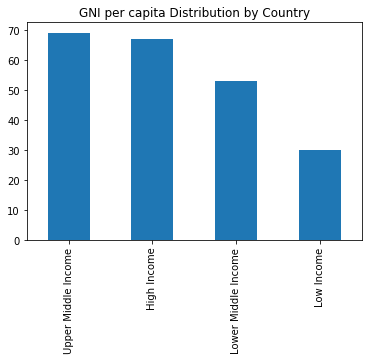

In [14]:
plot1 = binned_gni.plot.bar(title='GNI per capita Distribution by Country')

Majority of the countries are classified as either Upper Middle Income or High Income.

### 1. Does lower level of corruption (CPI) lead to higher income (GNI/capita)?

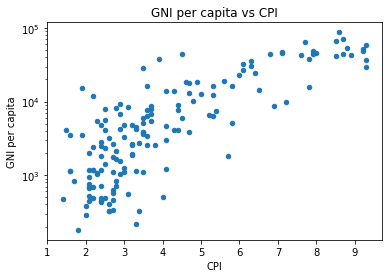

In [15]:
plot2 = cpi_gni_pc.plot.scatter(x='CPI', y='GNI per capita', title='GNI per capita vs CPI')
plot2.set_yscale('log')

The graph above shows that countries with lower lovel of corruption (higher CPI index) tend to have higher income (GNI per capita).
This could be due to the fact that governments that are transparent are more likely to invest public money to drive economoic growth which lead to higher income per capita and standard of living.
On the other way, it is less likely that higher income per capita leads to less corrupted government.

### Does higher income (GNI/capita) lead to higher standard of living (HDI)?

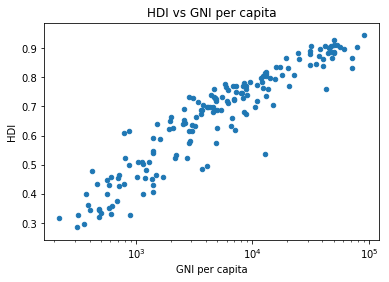

In [16]:
plot2 = gni_pc_hdi.plot.scatter(x='GNI per capita', y='HDI', title='HDI vs GNI per capita')
plot2.set_xscale('log')

Countries with higher income (GNI per capita) have higher human development index (HDI) which is an indicator of standard of living, education level and income level. As a result, both variable should show a strong positive correlation as income is one of the components in calculating HDI.

### What are the characteristics of export-dependent nations?

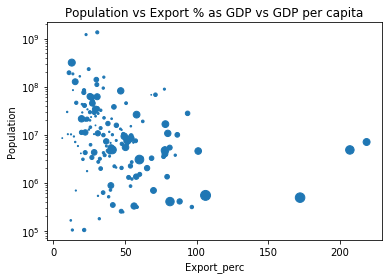

In [17]:
plot3 = export_pop_gdp_pc.plot.scatter(x='Export_perc', y='Population', s=export_pop_gdp_pc['GDP per capita']*0.001, title='Population vs Export % as GDP vs GDP per capita');
plot3.set_yscale('log')

#The size of the bubble indicates the GDP per capita value of each country

In [18]:
export1 = export_pop_gdp_pc.sort_values(by='Export_perc', ascending=False)
export1.head()

,Country,Export_perc,Population,GDP per capita
61,"Hong Kong, China",218.861632,7069378,48108.0
121,Singapore,207.170536,4836691,72056.0
80,Luxembourg,172.366716,491772,91147.0
81,"Macao, China",106.294511,547591,98722.0
66,Ireland,101.165280,4589002,43860.0


From the graph, countries that are more dependent of export when compared to their economy size (>75%) tend to have higher GDP per capita (bigger bubble size).
At the same time, it is observed that the population size is also less than 10 millions in almost all cases.

Few examples of such countries/regions are Singapore, Hong Kong and Luxembourg where all of them are small and open economies.

### Will higher level of expenditure in healthcare, especially government expenditure, lead to higher life expectancy?

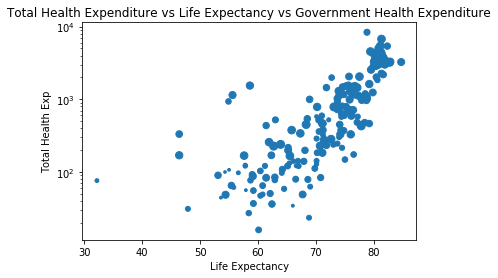

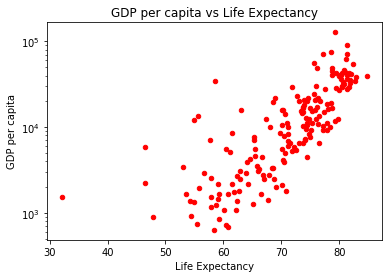

In [19]:
plot4a = life_totalexp_governmentexp_gdp_pc.plot.scatter(x='Life Expectancy', y='Total Health Exp', s=life_totalexp_governmentexp_gdp_pc['Gov Exp %']*70, title='Total Health Expenditure vs Life Expectancy vs Government Health Expenditure');
plot4b = life_totalexp_governmentexp_gdp_pc.plot.scatter(x='Life Expectancy', y='GDP per capita', color='Red', title='GDP per capita vs Life Expectancy');

plot4a.set_yscale('log')
plot4b.set_yscale('log')

In the first graph (blue) above, higher expenditure in health corresponds with higher life expectancy.
At the same time, it seems that most countries have similar level of governmental support when it comes to health expenditure and therefore if can be concluded higher level of government expenditure on health doesn't result in higher life expectancy.

In the second graph (red), higher GDP per capita is highly correlated to higher life expectancy. One of the reasons could be due to higher GDP per capita enables citizens to have more disposable income to spend on health realted expenditure.

### Do higher economic output (GDP/capita) and oil-producing nations have higher carbon footpirnt (CO2 emission/capita)?

(0, 50)

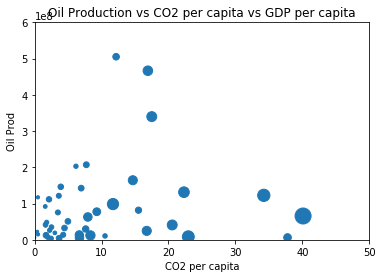

In [20]:
plot5 = co2_oil_gdp_pc.plot.scatter(x='CO2 per capita', y='Oil Prod', s=co2_oil_gdp_pc['GDP per capita']*0.002, title='Oil Production vs CO2 per capita vs GDP per capita');
plot5.set_ylim(0,600000000)
plot5.set_xlim(0,50)

Countries with high CO2 emission per capita are those who are either oil-producing countries or those with high GDP per capita.

<a id='conclusions'></a>
## Conclusions
From the visualizations above, most of the inferences are based on correlation and not causation. In order to prove the causation among variables, most in depth studies need to be carried out and other independent variables need to be controlled.

### Limitation
1. Most of the datasets have quite a number of missing datas. This causes a lot of the countries to be excluded in studying the relationship between variables.

2. Most recent data available are usually before the year of 2011. The lack of most updated data prevented the studying of how most economies perform after the global financial crisis in 2008.

In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0